**MMSegmentation Running examples**, including:


1.   MMSegmentation Installation
2.   Making predictions with pretrained models
3.   Training the model with own data
4.   Testing the well-trained model

---

Materials were borrowed from [MMSegmentation_Tutorial](https://github.com/TommyZihao/MMSegmentation_Tutorials.git) @TommyZihao


# Install MMSegmentation

## Install MMCV with MIM

In [ ]:
!pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.3.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.7/451.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 11.1 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.3.0/index.html
  Using cached https://download.openmmlab.com/mmcv/dist/cu121/torch2.3.0/mmcv-2.2.0-cp310-cp310-manylinux1_x86_64.whl (97.9 MB)


## Install other packages

In [ ]:
!pip install opencv-python pillow matplotlib seaborn tqdm pytorch-lightning ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.3/802.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 18.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

## Download and Install MMSegmentation

In [ ]:
# remove old mmsegmentation codes
!rm -rf mmsegmentation

# git clone and install mmsegmentation in the editable mode
!git clone https://github.com/open-mmlab/mmsegmentation.git
%cd mmsegmentation
!git checkout main
!pip install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 16493, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 16493 (delta 68), reused 118 (delta 65), pack-reused 16328
Receiving objects: 100% (16493/16493), 43.86 MiB | 33.87 MiB/s, done.
Resolving deltas: 100% (11451/11451), done.
/content/mmsegmentation
Already on 'main'
Your branch is up to date with 'origin/main'.
Obtaining file:///content/mmsegmentation
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmsegmentation


## Check installation

In [ ]:
# check Pytorch
import torch, torchvision
print('Pytorch version: ', torch.__version__)
print('Whether CUDA is availabel: ',torch.cuda.is_available())

Pytorch version:  2.3.0+cu121
Whether CUDA is availabel:  True


In [ ]:
# check mmcv
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV version: ', mmcv.__version__)
print('CUDA version: ', get_compiling_cuda_version())
print('Compiler version: ', get_compiler_version())

MMCV version:  2.2.0
CUDA version:  12.1
Compiler version:  GCC 9.3


In [ ]:
# check mmsegmentation
import mmseg
from mmseg.utils import register_all_modules
from mmseg.apis import inference_model, init_model
print('mmsegmentation version: ', mmseg.__version__)
# if the version assertion error pops up
# change MMCV_MAX = '2.2.0' to '2.2.1' in the __init__.py file

mmsegmentation version:  1.2.2


# Making predictions with pretrained models

- We will use the **London street view image** as an example, and make predictions for it using the **Segformer** model pretrained with the Cityscpaes dataset.
- [Cityscapes](https://www.cityscapes-dataset.com) semantic segmentation dataset has 19 classes:
`road`, `sidewalk`, `building`, `wall`, `fence`, `pole`,
`traffic light`, `traffic sign`, `vegetation`, `terrain`, `sky`,
`person`, `rider`, `car`, `truck`, `bus`, `train`, `motorcycle`,
`bicycle`

---

To reload the model. we need:
  1. config file, and
  2. corresponding checkpoint file

Checkpoints can be download from the Openmmlab Model Zoo：https://github.com/open-mmlab/mmsegmentation/tree/main#benchmark-and-model-zoo

---

In the following, we will get

- the `config` file from `configs/segformer/segformer_mit-b5_8xb1-160k_cityscapes-1024x1024.py`
- the `checkpoint` file from `https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth`

## Download example data
Download the **Lond street view image** to the 'data' directory



In [ ]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_uk.jpeg -P data

--2024-05-27 12:03:30--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_uk.jpeg
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 469065 (458K) [image/jpeg]
Saving to: ‘data/street_uk.jpeg’

street_uk.jpeg      100%[===================>] 458.07K   379KB/s    in 1.2s    

2024-05-27 12:03:33 (379 KB/s) - ‘data/street_uk.jpeg’ saved [469065/469065]



## Method 1: uisng py script

In [ ]:
!python demo/image_demo.py \
        data/street_uk.jpeg \
        configs/segformer/segformer_mit-b5_8xb1-160k_cityscapes-1024x1024.py \
        https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth \
        --out-file outputs/B1_uk_segformer.jpg \
        --device cuda:0 \
        --opacity 0.5

/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth
Downloading: "https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth" to /root/.cache/torch/hub/checkpoints/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth
100% 313M/313M [00:21<00:00, 15.2MB/s]
/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <c

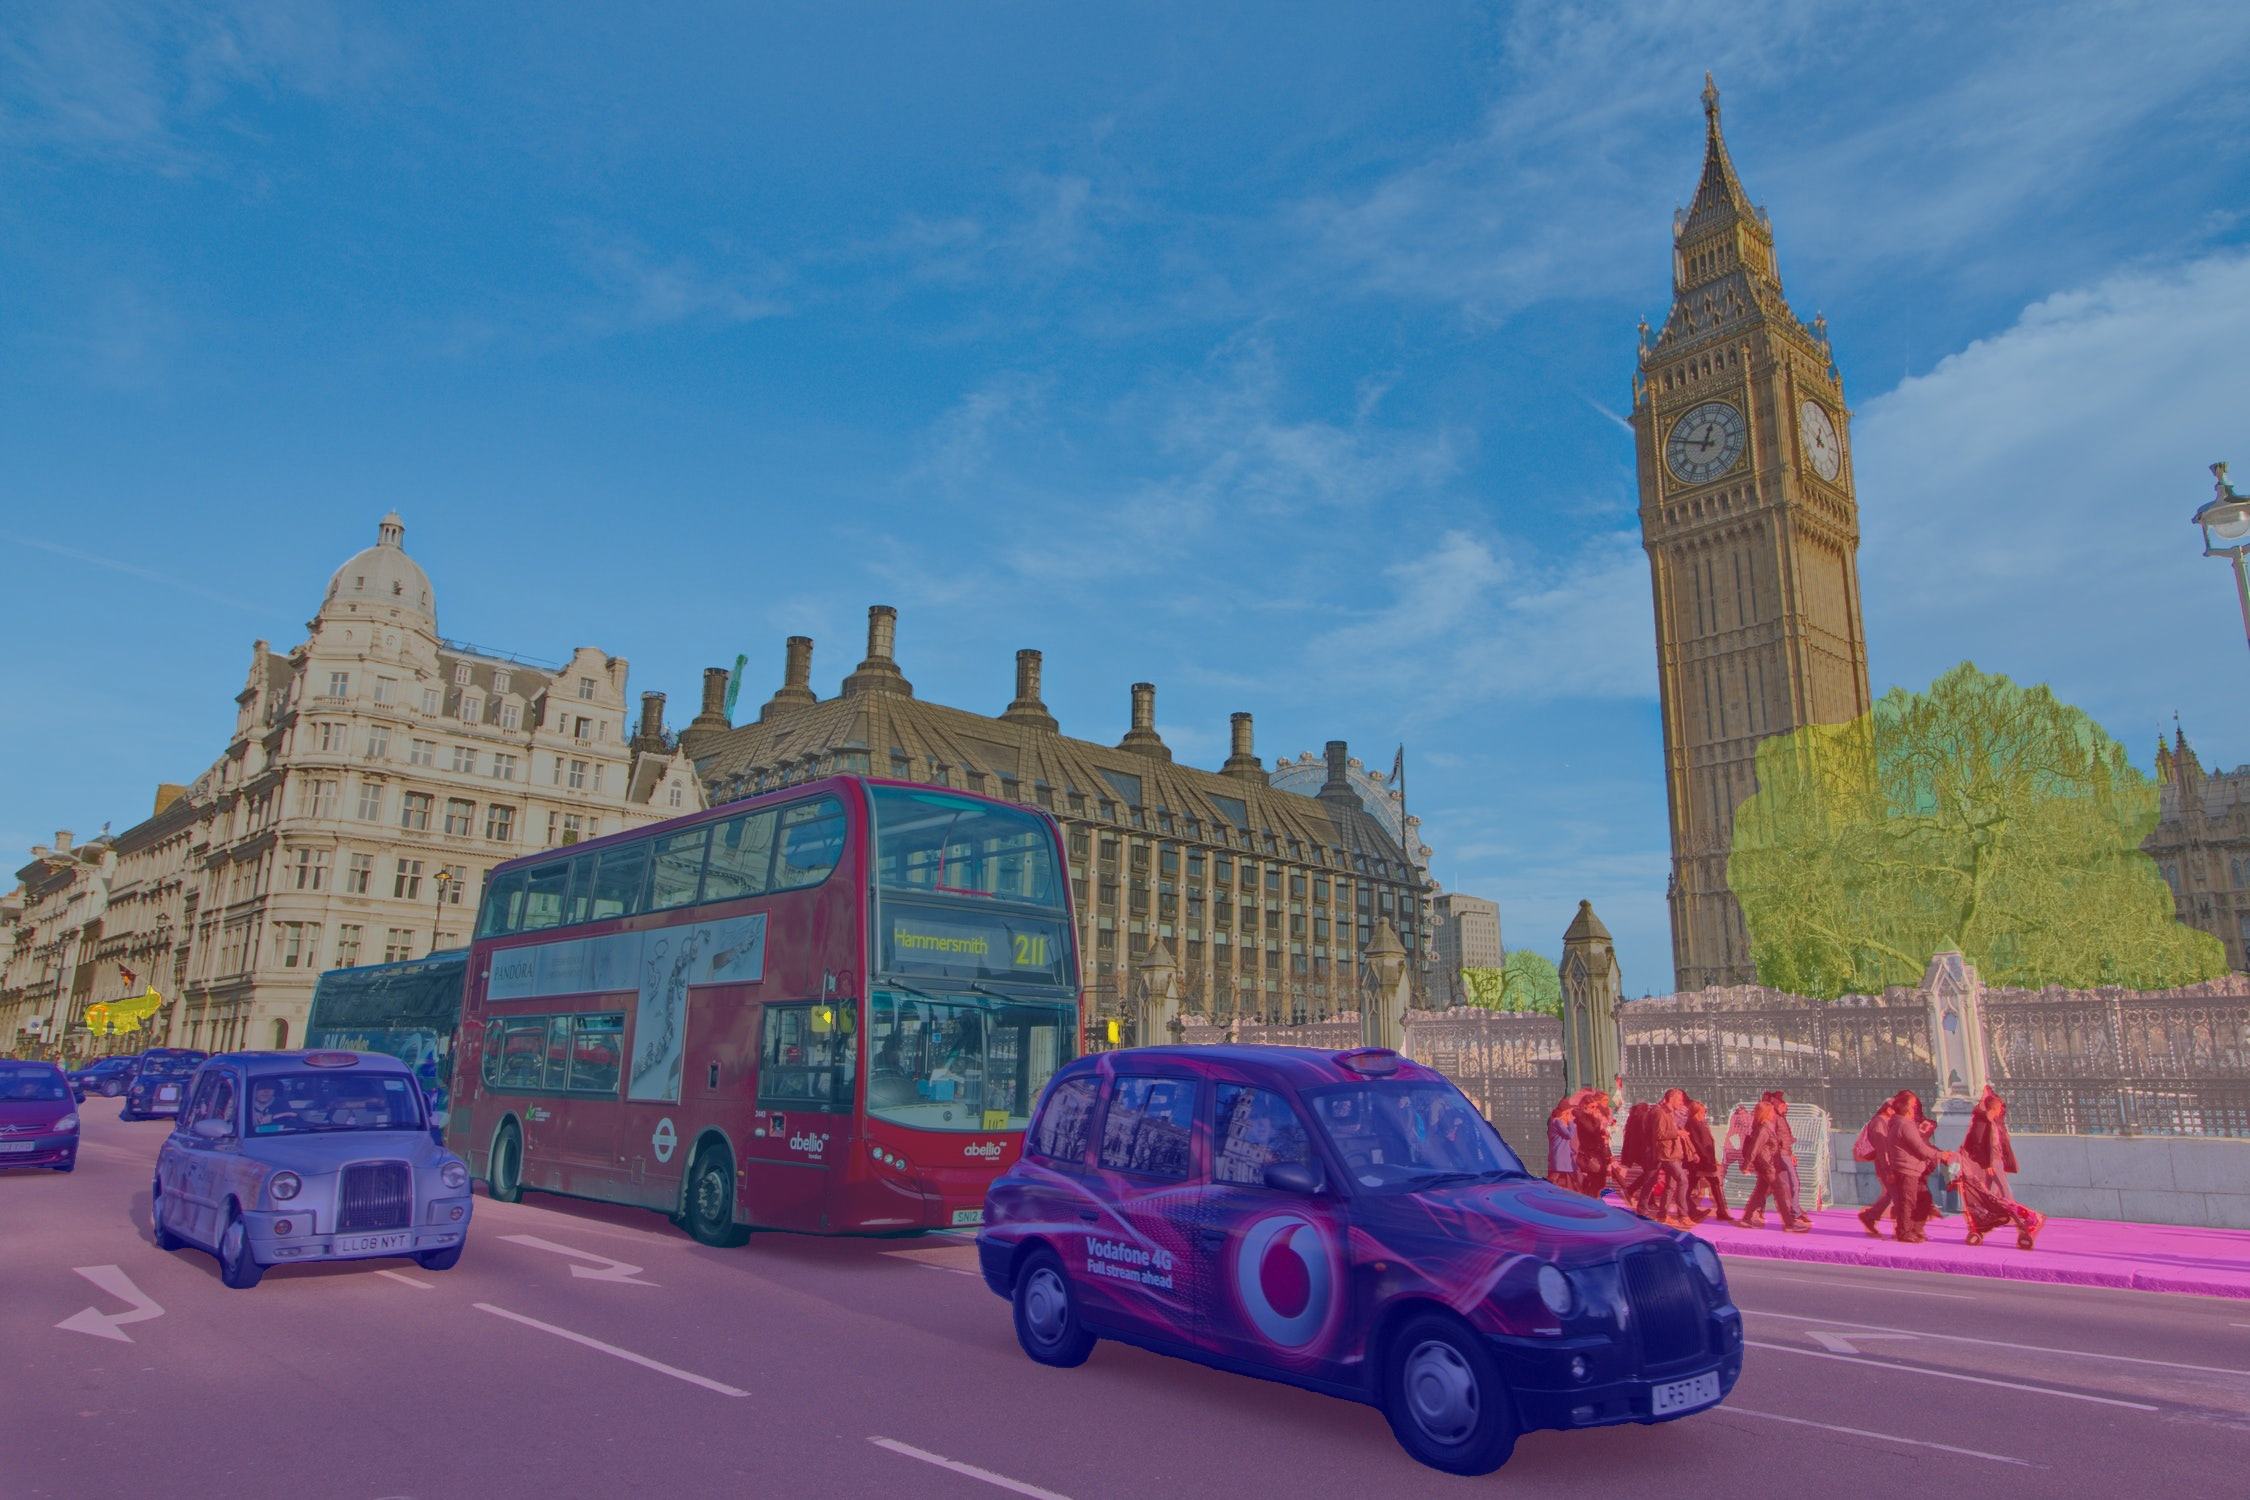

In [ ]:
from PIL import Image
Image.open('outputs/B1_uk_segformer.jpg')

## Method 2: loading the model step by step

In [ ]:
import numpy as np
import cv2

from mmseg.apis import init_model, inference_model, show_result_pyplot
import mmcv

import matplotlib.pyplot as plt
%matplotlib inline

# config file path
config_file = 'configs/segformer/segformer_mit-b5_8xb1-160k_cityscapes-1024x1024.py'
# checkpoint downloading link
checkpoint_file = 'https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth'


### a> Initializing the model

In [ ]:
model = init_model(config_file, checkpoint_file, device='cuda:0')

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth


### b> Loading the test image

Image size: (1500, 2250, 3)


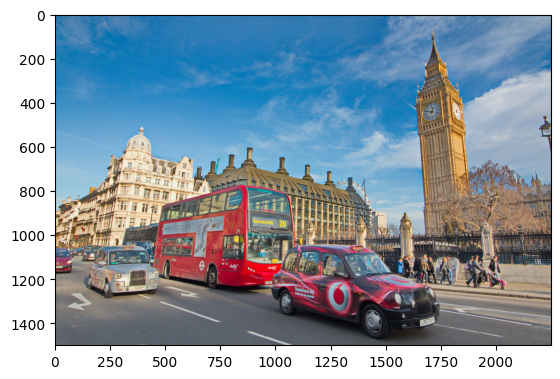

In [ ]:
img_path = 'data/street_uk.jpeg'
img_bgr = cv2.imread(img_path)
print(f'Image size: {img_bgr.shape}')

plt.figure()
plt.imshow(img_bgr[:,:,::-1])

### c> Inference

In [ ]:
result = inference_model(model, img_bgr)

In [ ]:
result.keys()

['seg_logits', 'pred_sem_seg']

In [ ]:
# 19 classes in total
np.unique(result.pred_sem_seg.data.cpu())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 13, 15])

In [ ]:
result.pred_sem_seg.data.shape

torch.Size([1, 1500, 2250])

In [ ]:
pred_mask = result.pred_sem_seg.data[0].detach().cpu().numpy()

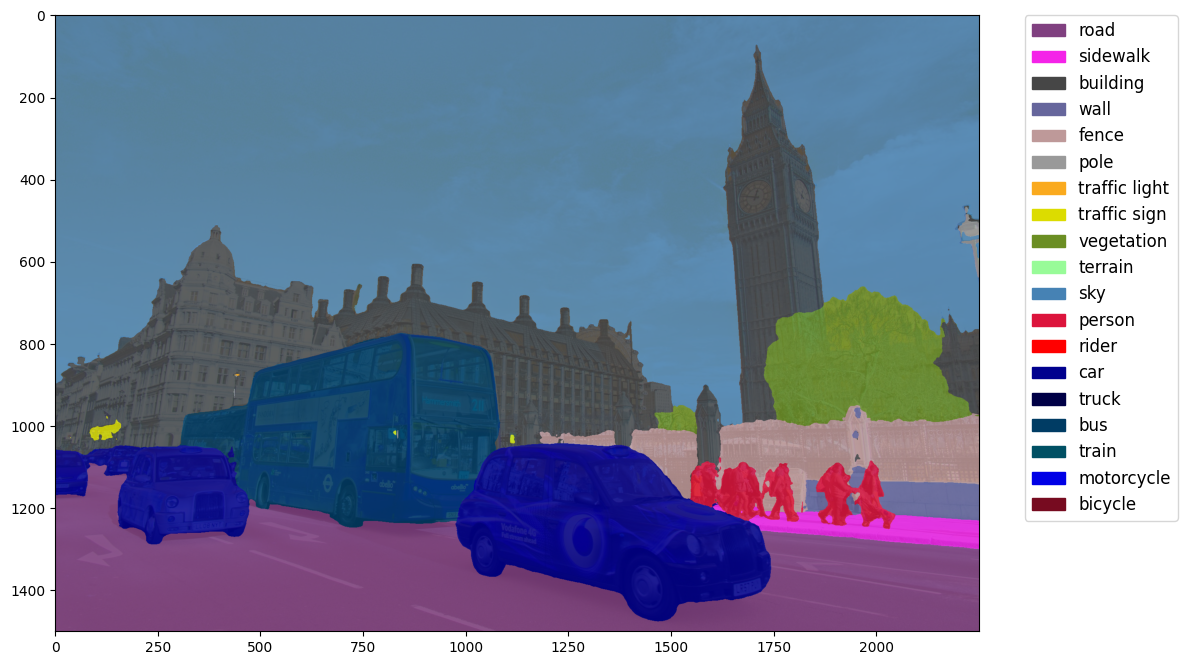

In [ ]:
from mmseg.datasets import cityscapes
import numpy as np
import mmcv
import matplotlib.patches as mpatches

# get cityscapes dataset's class names and palette for visualization
classes = cityscapes.CityscapesDataset.METAINFO['classes']
palette = cityscapes.CityscapesDataset.METAINFO['palette']
opacity = 0.15

# assign predefined colors to each class
seg_map = pred_mask.astype('uint8')
seg_img = Image.fromarray(seg_map).convert('P')
seg_img.putpalette(np.array(palette, dtype=np.uint8))

# show the predictions
plt.figure(figsize=(14, 8))
im = plt.imshow(((np.array(seg_img.convert('RGB')))*(1-opacity) + mmcv.imread(img_path)*opacity) / 255)

# legend
patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(len(classes))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='large')

# Training the model with own data
- We will use the Watermelon dataset by @TommyZihao
- Instruction of the dataset (in Chinese): https://github.com/TommyZihao/Train_Custom_Dataset/tree/main/%E8%AF%AD%E4%B9%89%E5%88%86%E5%89%B2/%E8%AF%AD%E4%B9%89%E5%88%86%E5%89%B2%E6%95%B0%E6%8D%AE%E9%9B%86


---
The dataset contains 6 classes:

| Color   | Class | Label |
| ---------- | -------- | ------------ |
| gray         | background     | 0            |
| red        | red flesh | 1            |
| green      | green outer shell| 2            |
| white      | white inner shell | 3            |
| black | black seeds | 4            |
| yellow | white seeds | 5            |

## Preparing the data

### a> Downloading
The downloaded data will be at `mmsegmentation/Watermelon87_Semantic_Seg_Mask`**bold text**

In [ ]:
# delete the old version (if any)
!rm -rf Watermelon87_Semantic_Seg_Mask.zip Watermelon87_Semantic_Seg_Mask

# downloading
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip

# unzipping
!unzip Watermelon87_Semantic_Seg_Mask.zip >> /dev/null

# deleting the zip file
!rm -rf Watermelon87_Semantic_Seg_Mask.zip

--2024-05-27 08:34:17--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13230174 (13M) [application/zip]
Saving to: ‘Watermelon87_Semantic_Seg_Mask.zip’

Watermelon87_Semant 100%[===================>]  12.62M  5.87MB/s    in 2.1s    

2024-05-27 08:34:21 (5.87 MB/s) - ‘Watermelon87_Semantic_Seg_Mask.zip’ saved [13230174/13230174]



In [ ]:
# data directory tree
!pip install seedir emoji -i https://pypi.tuna.tsinghua.edu.cn/simple
import seedir as sd
sd.seedir('Watermelon87_Semantic_Seg_Mask', style='emoji', depthlimit=2)

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 kB 163.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 1.4 MB/s eta 0:00:00
📁 Watermelon87_Semantic_Seg_Mask/
├─📁 ann_dir/
│ ├─📁 train/
│ └─📁 val/
└─📁 img_dir/
  ├─📁 train/
  └─📁 val/


### b> Visualization

In [ ]:
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

# data path
img_path = 'Watermelon87_Semantic_Seg_Mask/img_dir/train/045_sozai_l.jpg'
mask_path = 'Watermelon87_Semantic_Seg_Mask/ann_dir/train/045_sozai_l.png'

# load data
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)[:,:,0]

In [ ]:
img.shape

(300, 440, 3)

In [ ]:
mask.shape

(300, 440)

Prepare the palette:

| Color   | Meaning | Label |
| ---------- | -------- | ------------ |
| gray         | background     | 0            |
| red        | red flesh | 1            |
| green      | green outer shell| 2            |
| white      | white inner shell | 3            |
| black | black seeds | 4            |
| yellow | white seeds | 5            |

In [ ]:
# palette (BGR)
palette = [
    ['background', [127,127,127]],
    ['red', [0,0,200]],
    ['green', [0,200,0]],
    ['white', [255,255,255]],
    ['seed-black', [30,30,30]],
    ['seed-white', [8,189,251]]
]

palette_dict = {}
for idx, each in enumerate(palette):
    palette_dict[idx] = each[1]

In [ ]:
# assign the colors to each class
viz_mask_bgr = np.zeros((mask.shape[0], mask.shape[1], 3))
for idx in palette_dict.keys():
    viz_mask_bgr[np.where(mask==idx)] = palette_dict[idx]
viz_mask_bgr = viz_mask_bgr.astype('uint8')

# overlap the image and mask
opacity = 0.5
label_viz = cv2.addWeighted(img, opacity, viz_mask_bgr, 1-opacity, 0)

(-0.5, 439.5, 299.5, -0.5)

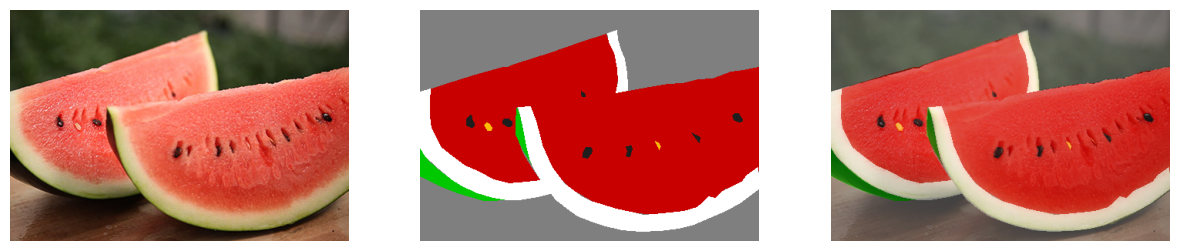

In [ ]:
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.imshow(img[:,:,::-1])
plt.axis('off')
plt.subplot(132)
plt.imshow(viz_mask_bgr[:,:,::-1])
plt.axis('off')
plt.subplot(133)
plt.imshow(label_viz[:,:,::-1])
plt.axis('off')

## Preparing the config files

### a> Data config file
Official instruction: https://mmsegmentation.readthedocs.io/en/latest/advanced_guides/datasets.html  
In this example, download the three auxiliary files (`WatermelonDataset.py`, `WatermelonDataset_pipeline.py`, `__init__.py`) from https://github.com/Vikki23/MMSegmentation-Running-Examples/tree/main/auxiliary
1. **dataset configuration**: put `WatermelonDataset.py` under `mmsegmentation/mmseg/datasets`  
Define the classes, and their names and colors  
New dataset inherits `BaseSegDataset`.
2. **registering the dataset**: replace `mmsegmentation/mmseg/datasets/__init__.py`
3. **pipeline configuration**: put `WatermelonDataset_pipeline.py` under `mmsegmentation/configs/_base_/datasets`  
Define the data path, data preprocessing, postprocessing, dataloaders, test and validation metrics, etc.

### b> Training config file
We will use the DeepLabv3+ as an example in the following. We do it in three steps:
1. loading the original config file
2. modifying the config settings
3. saving the new config file for training

In [ ]:
# 1 - loading the original config file
from mmengine import Config
# model config
cfg = Config.fromfile('./configs/deeplabv3plus/deeplabv3plus_r50-d8_4xb4-80k_ade20k-512x512.py')
# data config
dataset_cfg = Config.fromfile('./configs/_base_/datasets/WatermelonDataset_pipeline.py')
# merge two to get final config
cfg.merge_from_dict(dataset_cfg)

In [ ]:
# 2 - modifying the config settings
# number of classes
NUM_CLASS = 6

# image size
cfg.crop_size = (512, 512)
cfg.model.data_preprocessor.size = cfg.crop_size

# we use one GPU, so we need to change SyncBN as BN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg

# modifying the decode/auxiliary classification heads
cfg.model.decode_head.num_classes = NUM_CLASS
cfg.model.auxiliary_head.num_classes = NUM_CLASS

# Batch Size
cfg.train_dataloader.batch_size = 4

# directory of results
cfg.work_dir = './work_dirs/WatermelonDataset-DeepLabV3plus'

# parameters for model saving and logging
cfg.train_cfg.max_iters = 2000 # number of iterations
cfg.train_cfg.val_interval = 100 # evaluation interval
cfg.default_hooks.logger.interval = 10 # logging interval
cfg.default_hooks.checkpoint.interval = 500 # model saving interval
cfg.default_hooks.checkpoint.max_keep_ckpts = 5 # the number of saved models
cfg.default_hooks.checkpoint.save_best = 'mIoU' # save best metric

# random seed
cfg['randomness'] = dict(seed=0)

In [ ]:
# 3 - saving the new config file for training
import os
fp_cfg = 'Watermelon-Configs'
if not os.path.exists(fp_cfg): os.mkdir(fp_cfg)
cfg.dump(f'{fp_cfg}/WatermelonDataset_DeepLabV3plus.py')

## Training

In [ ]:
cwd = os.getcwd()
if cwd.split('/')[-1] != 'mmsegmentation':
  os.chdir('mmsegmentation')
os.getcwd()

'/content/mmsegmentation'

In [ ]:
!python tools/train.py Watermelon-Configs/WatermelonDataset_DeepLabV3plus.py

05/27 09:43:10 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.3.0+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.3.6 (Git Hash 86e6af5974177e513fd3fee58425e1063e7f1361)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 12.1
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-ge

## Training metrics
Visualize the training data saved in `work_dirs`

### a> Loading logging data

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# path of logging: to change the subdirectory here
log_path = './work_dirs/WatermelonDataset-DeepLabV3plus/20240527_094309/vis_data/scalars.json'

with open(log_path, "r") as f:
    json_list = f.readlines()

len(json_list)

In [ ]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = pd.concat([df_test, pd.DataFrame([eval(each)])], ignore_index=True)
    else:
        df_train = pd.concat([df_train, pd.DataFrame([eval(each)])], ignore_index=True)


In [ ]:
df_train

lr  data_time      loss  decode.loss_ce  decode.acc_seg  \
0    0.009999   0.011877  1.984366        1.375034       56.498337   
1    0.009998   0.012173  1.468262        1.032789       75.632095   
2    0.009997   0.011133  1.216946        0.833549       75.190926   
3    0.009996   0.015681  1.112019        0.788598       64.815231   
4    0.009995   0.013859  0.945753        0.675516       78.887268   
..        ...        ...       ...             ...             ...   
195  0.009782   0.017061  0.316662        0.208305       97.235680   
196  0.009780   0.014986  0.257478        0.172925       96.760750   
197  0.009779   0.013709  0.332046        0.224205       95.864960   
198  0.009778   0.017911  0.255818        0.170251       97.065063   
199  0.009777   0.014951  0.216921        0.144435       85.444550   

     aux.loss_ce  aux.acc_seg      time  iter  memory  step  
0       0.609332    55.141163  4.300951    10   11611    10  
1       0.435472    61.639309  1.353881    20    7189    20  
2       0.383396    75.793930  1.349949    30    7189    30  
3       0.323421    65.979958  1.365710    40    7189    40  
4       0.270237    81.416702  1.376316    50    7189    50  
..           ...          ...       ...   ...     ...   ...  
195     0.108358    97.191620  1.370519  1960    7189  1960  
196     0.084553    93.966003  1.367964  1970    7189  1970  
197     0.107841    93.966866  1.367935  1980    7189  1980  
198     0.085567    96.120262  1.370487  1990    7189  1990  
199     0.072486    82.904053  1.371381  2000    7189  2000  

[200 rows x 11 columns]

In [ ]:
df_test

aAcc   mIoU   mAcc  mDice  mFscore  mPrecision  mRecall  data_time  \
0   85.00  38.51  45.32  46.58    69.88       77.88    45.32   0.049340   
1   86.80  53.47  65.01  63.61    76.33       76.86    65.01   0.014560   
2   78.23  49.84  65.64  60.73    72.88       76.94    65.64   0.013751   
3   90.06  59.27  68.49  68.75    82.50       84.38    68.49   0.023173   
4   88.00  56.61  69.30  66.30    79.56       76.98    69.30   0.029054   
5   88.47  56.45  67.51  66.49    79.79       80.07    67.51   0.012699   
6   84.99  56.43  70.38  65.72    78.87       78.93    70.38   0.014831   
7   90.37  60.65  70.49  70.34    70.34       84.92    70.49   0.021534   
8   94.54  67.20  73.64  75.94    75.94       90.16    73.64   0.025540   
9   95.02  73.49  80.71  82.76    82.76       89.32    80.71   0.028711   
10  93.02  67.15  74.25  78.25    78.25       86.93    74.25   0.011638   
11  95.33  74.45  79.62  83.84    83.84       91.02    79.62   0.027765   
12  93.31  69.63  76.69  80.08    80.08       88.24    76.69   0.017459   
13  94.73  72.66  79.91  82.27    82.27       89.60    79.91   0.026817   
14  88.13  65.73  81.39  77.78    77.78       79.07    81.39   0.014912   
15  88.41  63.72  75.90  75.09    75.09       85.49    75.90   0.023830   
16  83.61  62.94  79.00  75.12    75.12       78.58    79.00   0.012710   
17  89.04  68.25  82.20  79.81    79.81       81.74    82.20   0.011296   
18  79.51  57.10  73.60  69.08    69.08       78.37    73.60   0.026370   

        time  step  
0   4.501607   100  
1   0.498481   200  
2   0.497553   300  
3   0.508392   400  
4   0.521226   500  
5   0.499242   600  
6   0.499046   700  
7   0.505802   800  
8   0.511174   900  
9   0.520675  1000  
10  0.497290  1100  
11  0.511610  1200  
12  0.507224  1300  
13  0.514870  1400  
14  0.503548  1500  
15  0.509572  1600  
16  0.499416  1700  
17  0.499297  1800  
18  0.515984  1900

### b> Visualization

In [ ]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    Randomly generate a kind of line plotting style
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

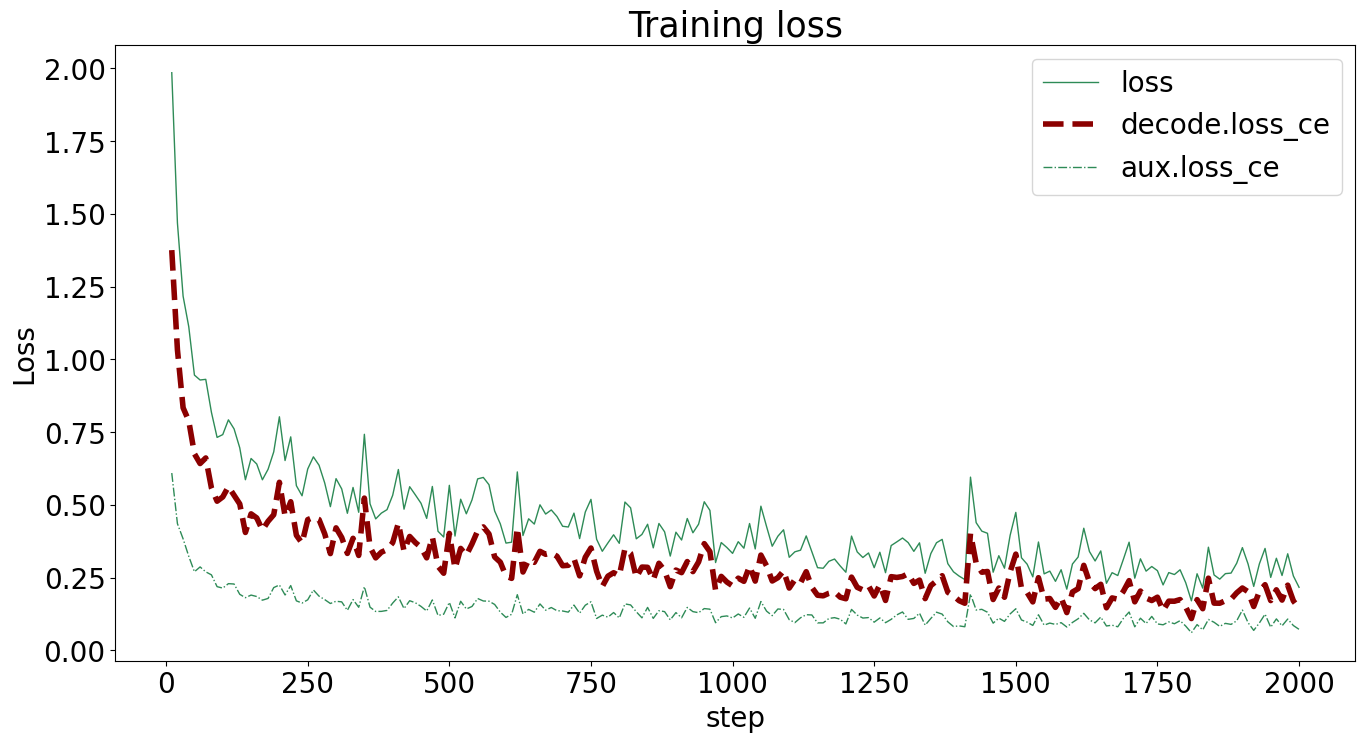

In [ ]:
# losses
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('Training loss', fontsize=25)

plt.legend(fontsize=20)

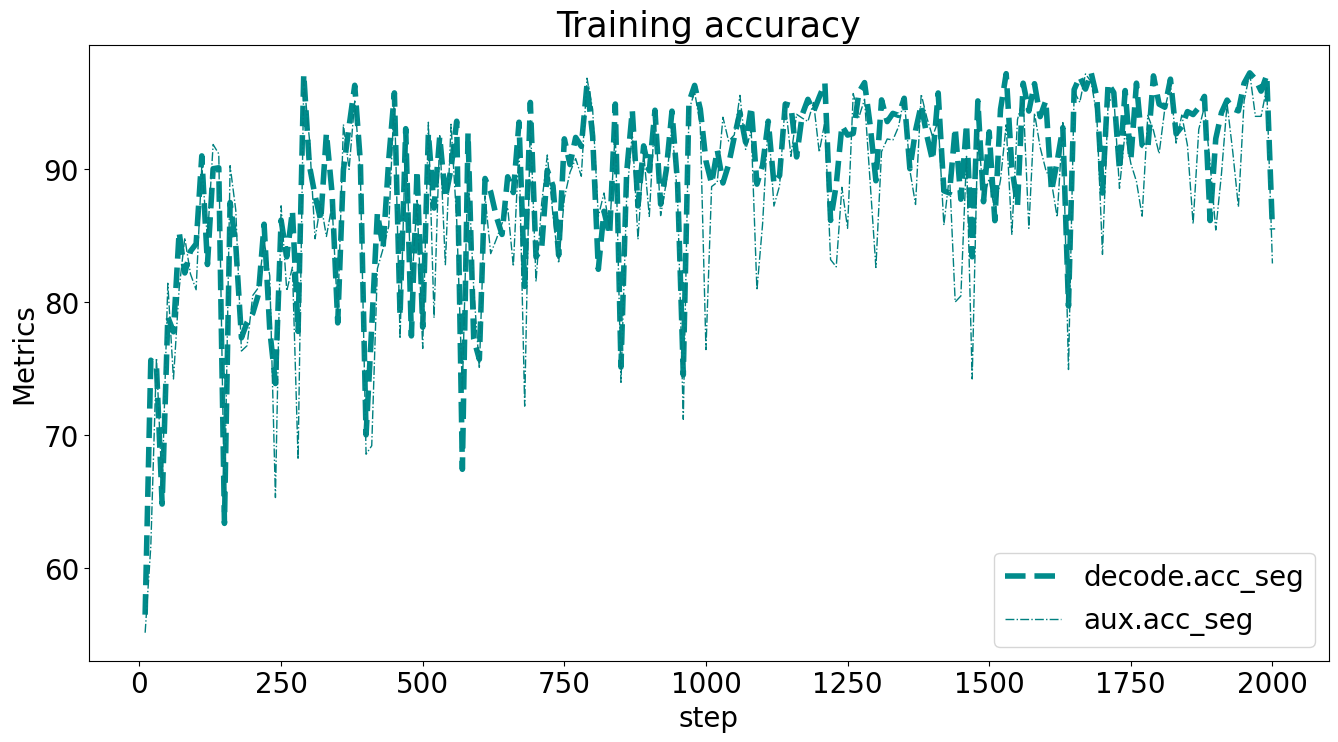

In [ ]:
# training accuracy

metrics = ['decode.acc_seg', 'aux.acc_seg']

plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('Training accuracy', fontsize=25)

plt.legend(fontsize=20)

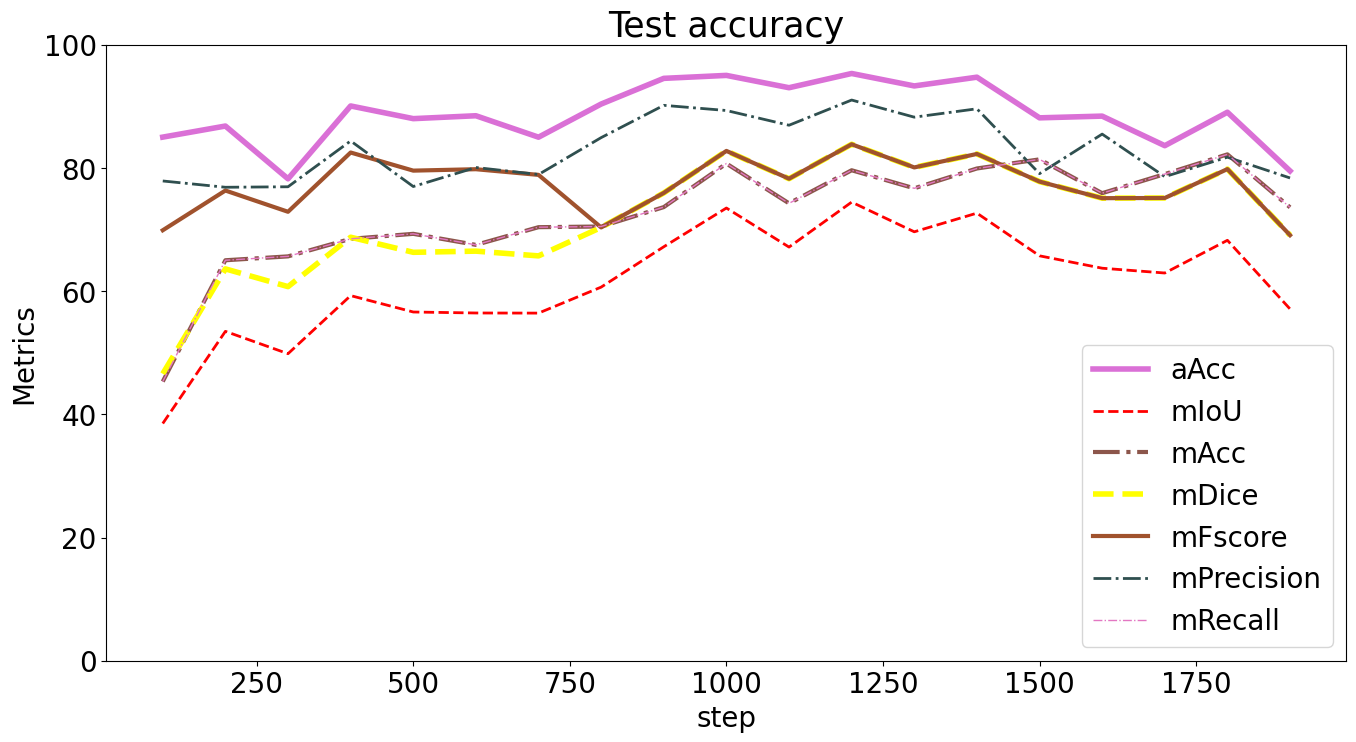

In [ ]:
# test accuracy
metrics = ['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall']

plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('Test accuracy', fontsize=25)

plt.legend(fontsize=20)

# Testing the well-trained model

## Getting the test metric from a given model

In [ ]:
!python tools/test.py Watermelon-Configs/WatermelonDataset_DeepLabV3plus.py ./work_dirs/WatermelonDataset-DeepLabV3plus/iter_2000.pth

05/27 10:43:32 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.140
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.3.0+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.3.6 (Git Hash 86e6af5974177e513fd3fee58425e1063e7f1361)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 12.1
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-ge

## Making predictions for a given image

### a> Initializing the model

In [ ]:
from mmseg.apis import init_model, inference_model, show_result_pyplot

# config files
config_file = 'Watermelon-Configs/WatermelonDataset_DeepLabV3plus.py'
checkpoint_file = './work_dirs/WatermelonDataset-DeepLabV3plus/iter_2000.pth'

device = 'cuda:0'

model = init_model(config_file, checkpoint_file, device=device)

Loads checkpoint by local backend from path: ./work_dirs/ZihaoDataset-DeepLabV3plus/iter_1200.pth


### b> Loading an image

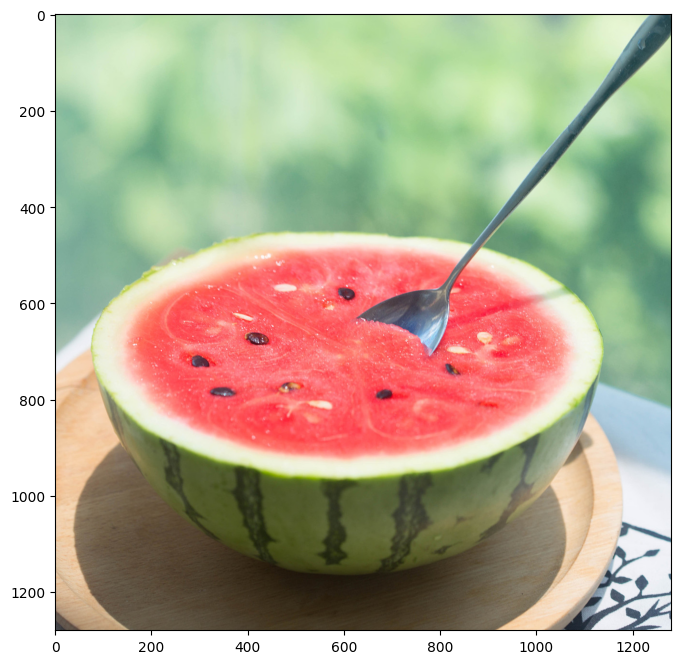

In [ ]:
import cv2

img_path = 'Watermelon87_Semantic_Seg_Mask/img_dir/val/01bd15599c606aa801201794e1fa30.jpg'
img_bgr = cv2.imread(img_path)

plt.figure(figsize=(8, 8))
plt.imshow(img_bgr[:,:,::-1])
plt.show()

### c> Making predictions

In [ ]:
result = inference_model(model, img_bgr)

In [ ]:
result.keys()

['pred_sem_seg', 'seg_logits']

In [ ]:
pred_mask = result.pred_sem_seg.data[0].cpu().numpy()

In [ ]:
pred_mask.shape

(1280, 1280)

In [ ]:
np.unique(pred_mask)

array([0, 1, 2, 3, 4, 5])

### d> Visualization

In [ ]:
# palette (BGR)
palette = [
    ['background', [127,127,127]],
    ['red', [0,0,200]],
    ['green', [0,200,0]],
    ['white', [255,255,255]],
    ['seed-black', [30,30,30]],
    ['seed-white', [8,189,251]]
]

palette_dict = {}
for idx, each in enumerate(palette):
    palette_dict[idx] = each[1]

In [ ]:
# predictions
opacity = 0.3

# coloring
pred_mask_bgr = np.zeros((pred_mask.shape[0], pred_mask.shape[1], 3))
for idx in palette_dict.keys():
    pred_mask_bgr[np.where(pred_mask==idx)] = palette_dict[idx]
pred_mask_bgr = pred_mask_bgr.astype('uint8')

# overlapping image and predictions
pred_viz_pure = cv2.addWeighted(img_bgr, 0, pred_mask_bgr, 1, 0)
pred_viz = cv2.addWeighted(img_bgr, 1-opacity, pred_mask_bgr, opacity, 0)

plt.figure(figsize=(21, 8))

plt.subplot(1,3,1)
plt.imshow(img_bgr[:,:,::-1])
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(pred_viz[:,:,::-1])
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(pred_viz_pure[:,:,::-1])
plt.axis('off')

Visualizing with the GT mask

(-0.5, 1279.5, 1279.5, -0.5)

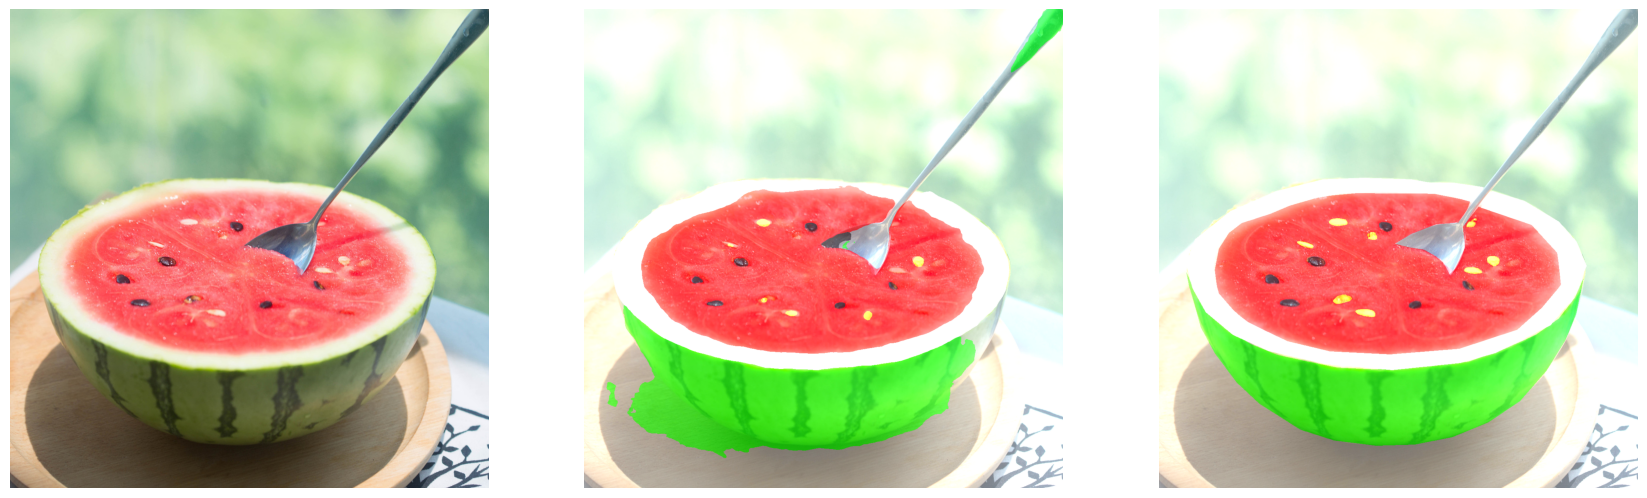

In [ ]:
label_path = 'Watermelon87_Semantic_Seg_Mask/ann_dir/val/01bd15599c606aa801201794e1fa30.png'
label_mask = cv2.imread(label_path)[:,:,0]

# for visualization
label_mask_bgr = np.zeros((label_mask.shape[0], label_mask.shape[1], 3))
for idx in palette_dict.keys():
    label_mask_bgr[np.where(label_mask==idx)] = palette_dict[idx]
label_mask_bgr = label_mask_bgr.astype('uint8')
label_viz = cv2.addWeighted(img_bgr, opacity, label_mask_bgr, opacity, 0)

plt.figure(figsize=(21, 8))

plt.subplot(1,3,1)
plt.imshow(img_bgr[:,:,::-1])
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(pred_viz[:,:,::-1])
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(label_viz[:,:,::-1])
plt.axis('off')

### Confusion matrix

In [ ]:
import itertools
def cnf_matrix_plotter(cm, classes, cmap=plt.cm.Blues):
    """
    Function for visualizing the confusion matrix

    cm: confusion matrix
    classes: class name list
    """
    plt.figure(figsize=(10, 10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(len(classes))

    plt.title('Confusion Matrix', fontsize=30)
    plt.xlabel('Pred', fontsize=25, c='r')
    plt.ylabel('True', fontsize=25, c='r')
    plt.tick_params(labelsize=16)
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 fontsize=12)

    plt.tight_layout()

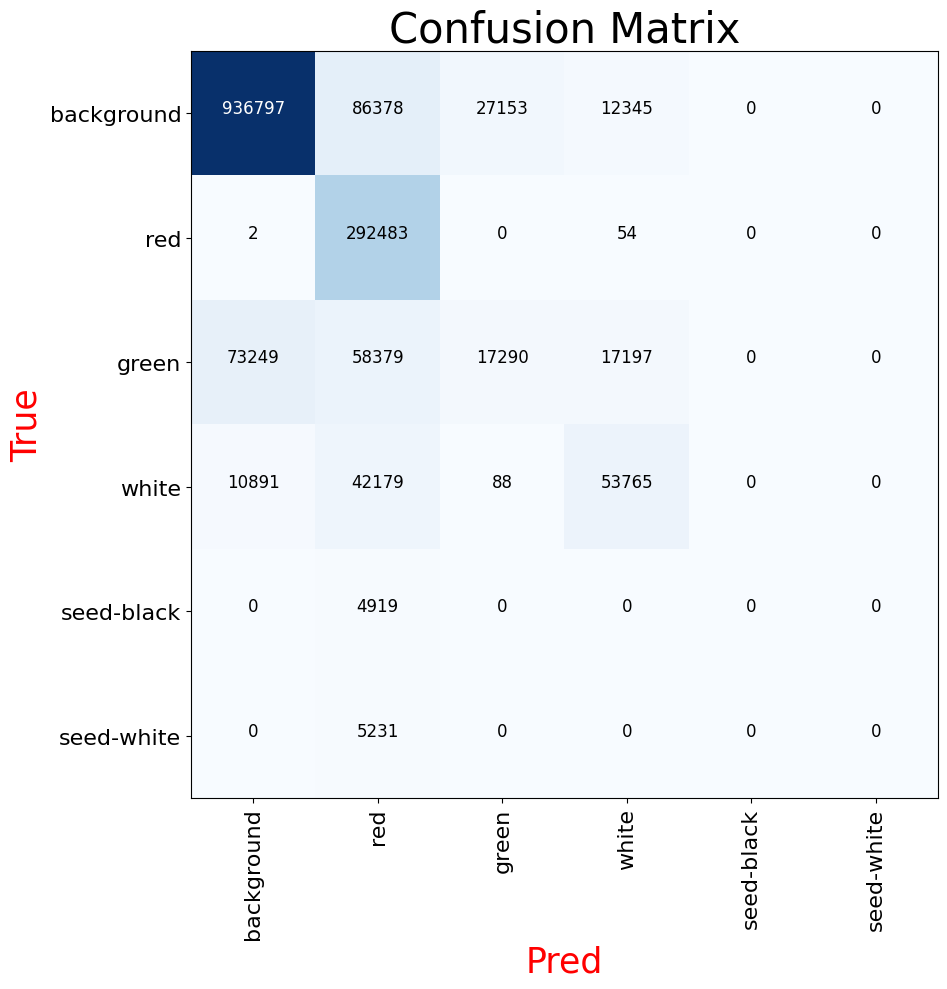

In [ ]:
from sklearn.metrics import confusion_matrix

# compute the confusion matrix
confusion_matrix_model = confusion_matrix(label_mask.flatten(), pred_mask.flatten())

# get class names
from mmseg.datasets import WatermelonDataset
classes = WatermelonDataset.METAINFO['classes']

cnf_matrix_plotter(confusion_matrix_model, classes, cmap='Blues')